# Importing our modules

In [1]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
birds = Table.read_table('snowy_plover.csv')
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight
28.8,21.84,7.4,5.2
29.04,22.45,7.7,5.4
29.36,22.48,7.9,5.6
30.1,21.71,7.5,5.3
30.17,22.75,8.3,5.9
30.34,22.84,8.5,5.8
30.36,22.5,8.2,5.8
30.46,22.72,8.3,6
30.54,23.31,9,6.1
30.62,22.94,8.5,6.2


# Standard Units

### Let's take a look at the relationship between Egg Weight and Bird Weight

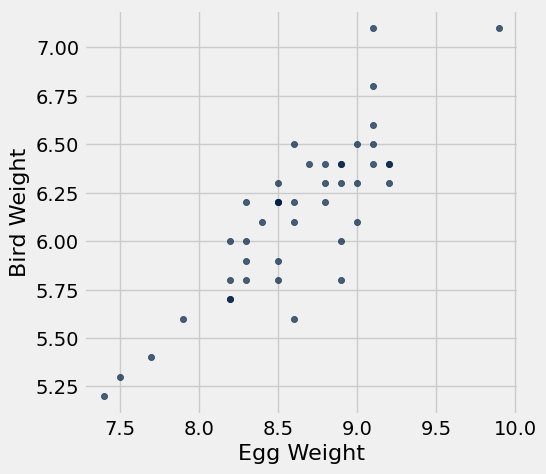

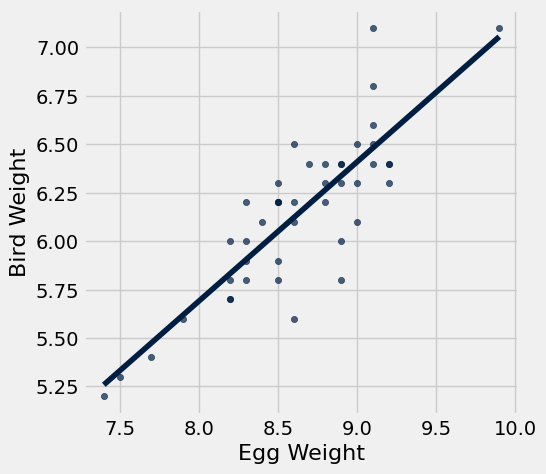

In [4]:
birds.scatter('Egg Weight','Bird Weight')
birds.scatter('Egg Weight','Bird Weight',fit_line=True)

In [9]:
e_weight_standard_units = (birds.column('Egg Weight') - np.mean(birds.column('Egg Weight'))) / np.std(birds.column('Egg Weight'))
e_weight_standard_units

array([-2.57850339, -1.95168489, -1.53380588, -2.36956389, -0.69804788,
       -0.28016888, -0.90698738, -0.69804788,  0.76452863, -0.28016888,
       -0.07122938, -0.90698738, -0.69804788,  0.13771013, -0.28016888,
       -0.48910838, -0.28016888,  0.55558913,  0.97346813,  0.55558913,
       -0.07122938, -0.28016888,  0.34664963, -0.69804788, -0.90698738,
       -0.90698738,  0.55558913, -0.28016888,  0.34664963, -0.07122938,
        0.97346813,  0.76452863,  0.55558913,  1.18240763,  0.97346813,
       -0.07122938,  0.34664963,  0.97346813,  1.18240763,  1.18240763,
        0.55558913,  0.97346813,  2.64498414,  0.76452863])

In [10]:
b_weight_standard_units = (birds.column('Bird Weight') - np.mean(birds.column('Bird Weight'))) / np.std(birds.column('Bird Weight'))
b_weight_standard_units

array([-2.32929889, -1.83656258, -1.34382628, -2.08293074, -0.60472183,
       -0.85108998, -0.85108998, -0.35835368, -0.11198552,  0.13438263,
        0.87348708, -1.09745813,  0.13438263,  0.62711893,  0.13438263,
       -0.11198552,  0.38075078,  0.38075078,  0.87348708, -0.35835368,
       -1.34382628,  0.13438263,  0.38075078, -0.85108998, -1.09745813,
       -0.35835368,  0.62711893, -0.60472183,  0.62711893,  0.13438263,
        2.35169599,  0.87348708, -0.85108998,  0.62711893,  0.62711893,
       -0.11198552,  0.13438263,  1.61259154,  0.38075078,  0.62711893,
        0.62711893,  1.11985523,  2.35169599,  0.38075078])

In [11]:
def standard_units_convert(input_data):
    ...
    return (input_data - np.mean(input_data))/np.std(input_data)

In [13]:
standard_units_convert(birds.column('Bird Weight')) == b_weight_standard_units

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [14]:
standard_units_convert(birds.column('Egg Breadth'))

array([-2.33314376, -0.95320593, -0.88534014, -2.62722887, -0.27454799,
       -0.0709506 , -0.84009628, -0.34241378,  0.99228018,  0.15526871,
        0.69819507, -0.81747435, -0.79485241,  1.08276791, -0.20668219,
       -0.1388164 ,  0.49459769,  1.24112143,  2.14599869,  1.87453551,
        0.11002485, -0.18406026, -0.02570674, -1.17942525, -1.54137616,
       -1.06631559,  0.67557314, -0.74960855, -0.11619447, -0.43290151,
        0.76606086,  0.51721962, -0.00308481,  1.06014597,  0.74343893,
       -0.43290151, -0.84009628,  0.60770734,  0.85654859,  0.81130473,
        0.15526871,  0.33624416,  1.87453551, -0.34241378])

# Correlation Coefficient `r`

In [20]:
correlation_r = np.mean(e_weight_standard_units * b_weight_standard_units)
correlation_r

0.84722752951013713

In [19]:
#birds.scatter('Egg Weight','Bird Weight')

In [17]:
def calculate_r(x_value_array, y_value_array):
    ...
    return np.mean(standard_units_convert(x_value_array)*standard_units_convert(y_value_array))

In [21]:
calculate_r(birds.column('Egg Weight'),birds.column('Bird Weight'))

0.84722752951013713

In [23]:
calculate_r(birds.column('Egg Weight'),birds.column('Egg Length'))

0.79244922496849057

# Linear Regression (Slope and Intercept)

In [24]:
# finding the standard deviations for our x-value & y-value arrays
x_val_sd = np.std(birds.column('Egg Weight'))
y_val_sd = np.std(birds.column('Bird Weight'))
print(correlation_r, x_val_sd, y_val_sd)

0.84722752951 0.478607441067 0.405896619986


In [26]:
slope_of_regression = correlation_r * (y_val_sd)/(x_val_sd)
slope_of_regression

0.7185153448936793

In [28]:
#finding the means for our x-value & y-value arrays
x_val_mean = np.mean(birds.column('Egg Weight'))
y_val_mean = np.mean(birds.column('Bird Weight'))
print(slope_of_regression, x_val_mean, y_val_mean)

0.718515344894 8.63409090909 6.14545454545


In [30]:
intercept = y_val_mean - slope_of_regression*x_val_mean
intercept

-0.058272261934288139

In [31]:
x_val_array = birds.column('Egg Weight')
y_estimates_array = slope_of_regression * x_val_array + intercept
birds = birds.with_columns('Estimates',y_estimates_array)
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight,Estimates
28.8,21.84,7.4,5.2,5.25874
29.04,22.45,7.7,5.4,5.4743
29.36,22.48,7.9,5.6,5.618
30.1,21.71,7.5,5.3,5.33059
30.17,22.75,8.3,5.9,5.90541
30.34,22.84,8.5,5.8,6.04911
30.36,22.5,8.2,5.8,5.83355
30.46,22.72,8.3,6,5.90541
30.54,23.31,9,6.1,6.40837
30.62,22.94,8.5,6.2,6.04911


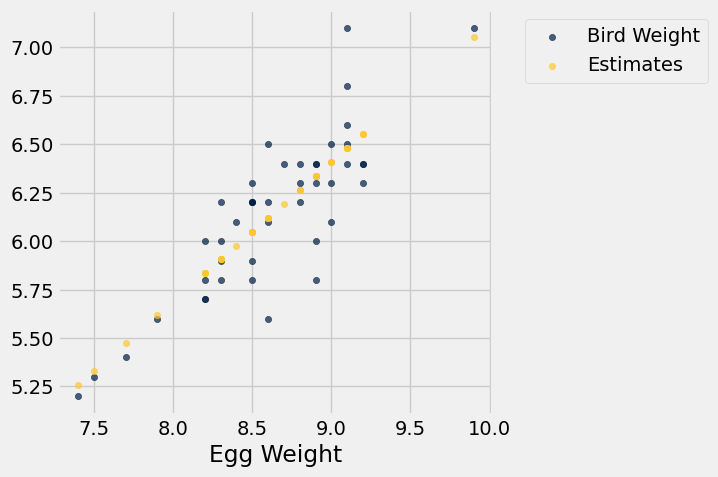

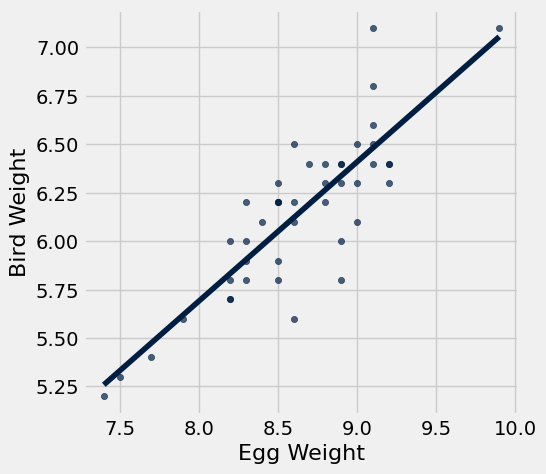

In [33]:
birds.select('Egg Weight','Bird Weight','Estimates').scatter('Egg Weight')
birds.scatter('Egg Weight','Bird Weight',fit_line=True)

# The Residual - Evaluating your Linear Regression Accuracy

In [34]:
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight,Estimates
28.8,21.84,7.4,5.2,5.25874
29.04,22.45,7.7,5.4,5.4743
29.36,22.48,7.9,5.6,5.618
30.1,21.71,7.5,5.3,5.33059
30.17,22.75,8.3,5.9,5.90541
30.34,22.84,8.5,5.8,6.04911
30.36,22.5,8.2,5.8,5.83355
30.46,22.72,8.3,6,5.90541
30.54,23.31,9,6.1,6.40837
30.62,22.94,8.5,6.2,6.04911


In [35]:
residual = birds.column('Estimates') - birds.column('Bird Weight')

In [36]:
birds = birds.with_columns('Residual',residual)
birds

Egg Length,Egg Breadth,Egg Weight,Bird Weight,Estimates,Residual
28.8,21.84,7.4,5.2,5.25874,0.0587413
29.04,22.45,7.7,5.4,5.4743,0.0742959
29.36,22.48,7.9,5.6,5.618,0.017999
30.1,21.71,7.5,5.3,5.33059,0.0305928
30.17,22.75,8.3,5.9,5.90541,0.0054051
30.34,22.84,8.5,5.8,6.04911,0.249108
30.36,22.5,8.2,5.8,5.83355,0.0335536
30.46,22.72,8.3,6,5.90541,-0.0945949
30.54,23.31,9,6.1,6.40837,0.308366
30.62,22.94,8.5,6.2,6.04911,-0.150892


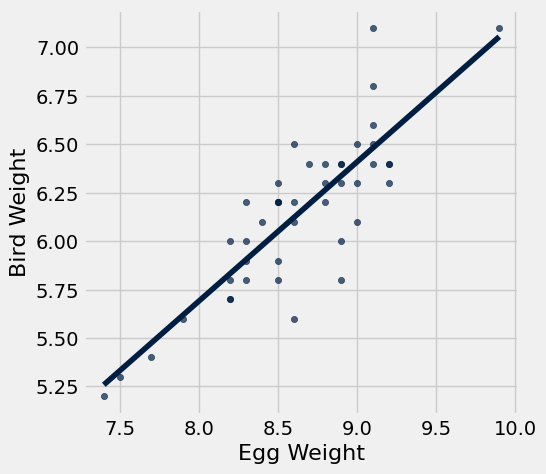

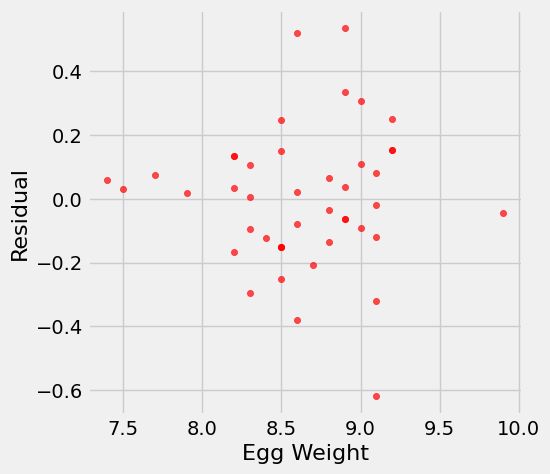

In [38]:
birds.scatter('Egg Weight','Bird Weight',fit_line=True)
birds.scatter('Egg Weight','Residual',color = 'r')